In [1]:
import pandas as pd
import os
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
import spacy
import collections
import numpy as np

In [2]:
# Reading of True and Fake news

df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
df_true.groupby(['subject']).count()

,title,text,date
subject,,,
politicsNews,11272,11272,11272
worldnews,10145,10145,10145


In [4]:
df_fake.groupby(['subject']).count()

,title,text,date
subject,,,
Government News,1570,1570,1570
Middle-east,778,778,778
News,9050,9050,9050
US_News,783,783,783
left-news,4459,4459,4459
politics,6841,6841,6841


# Creation of labels and collating the data

In [5]:
# Adding labels to true and fake datas
df_true['label'] = [ 1 for i in range(df_true.shape[0])]
df_fake['label'] = [ 0 for i in range(df_fake.shape[0])]

df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
# combining title and text to create a discrimating feature
df_true['feature'] = [ " ".join(val) for val in df_true[['title', 'text']].values ]
df_fake['feature'] = [ " ".join(val) for val in df_fake[['title', 'text']].values ]


In [7]:
# dropping the less important columns i.e., subject and date and title and text as we use feature column as main
df_true = df_true.drop(columns = ['subject', 'date', 'title', 'text'])
df_fake = df_fake.drop(columns = ['subject', 'date', 'title', 'text'])

df_true.head()

,label,feature
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [8]:
#collating the true and fake data
df_data = df_true.append(df_fake, ignore_index = True)
df_data

/var/folders/sh/69gr6cn5147cmyjyhcvmwrt80000gq/T/ipykernel_50365/2136507629.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_true.append(df_fake, ignore_index = True)


,label,feature
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...
...,...,...
44893,0,McPain: John McCain Furious That Iran Treated ...
44894,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896,0,How to Blow $700 Million: Al Jazeera America F...


In [9]:
# distribution of fake and true data
df_data.groupby(['label']).count()

,feature
label,
0,23481
1,21417


# Cleaning of Data

In [10]:
# converting all the words in feature column (title + text) into lower case to have uniformity

df_data['cleaned_feature'] = [ val.lower() for val in df_data['feature'].values]

print("Original text : ",df_data.iloc[-2]['feature'][:100])
print("Lowercase text : ",df_data.iloc[-2]['cleaned_feature'][:100])

Original text :  How to Blow $700 Million: Al Jazeera America Finally Calls it Quits 21st Century Wire says Al Jazeer
Lowercase text :  how to blow $700 million: al jazeera america finally calls it quits 21st century wire says al jazeer


In [11]:
# removing the puncuations
df_data['cleaned_feature1'] = [ re.sub(r'[^\w\s]', '', val) for val in df_data['cleaned_feature'].values]

# removing numbers
df_data['cleaned_feature1'] = [ re.sub(r'[0-9]', '', val) for val in df_data['cleaned_feature1'].values]

# removing all single characters 
df_data['cleaned_feature1'] = [ re.sub(r'\b[a-zA-Z]\b', '', val) for val in df_data['cleaned_feature1'].values]

df_data

,label,feature,cleaned_feature,cleaned_feature1
0,1,"As U.S. budget fight looms, Republicans flip t...","as u.s. budget fight looms, republicans flip t...",as us budget fight looms republicans flip thei...
1,1,U.S. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,us military to accept transgender recruits on ...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,senior u.s. republican senator: 'let mr. muell...,senior us republican senator let mr mueller do...
3,1,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...,trump wants postal service to charge 'much mor...,trump wants postal service to charge much more...
...,...,...,...,...
44893,0,McPain: John McCain Furious That Iran Treated ...,mcpain: john mccain furious that iran treated ...,mcpain john mccain furious that iran treated u...
44894,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,justice? yahoo settles e-mail privacy class-ac...,justice yahoo settles email privacy classactio...
44895,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan us and allied safe zone plan to take...
44896,0,How to Blow $700 Million: Al Jazeera America F...,how to blow $700 million: al jazeera america f...,how to blow million al jazeera america finall...


In [12]:
print("Original text : ",df_data.iloc[-2]['cleaned_feature'][:100])
print("Puncuation removed & lowercase text : ",df_data.iloc[-2]['cleaned_feature1'][:100])

Original text :  how to blow $700 million: al jazeera america finally calls it quits 21st century wire says al jazeer
Puncuation removed & lowercase text :  how to blow  million al jazeera america finally calls it quits st century wire says al jazeera ameri


In [13]:
# Removal of stop words - combining spacy and nltk common stop-words to get reduce the data
sw_nltk = stopwords.words("english")

#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words

stop_words = set(sw_spacy).union(sw_nltk)

df_data['cleaned_text2'] = [ " ".join([ val for val in text.split() if val not in stop_words])
                            for text in df_data['cleaned_feature1'].values]
df_data

,label,feature,cleaned_feature,cleaned_feature1,cleaned_text2
0,1,"As U.S. budget fight looms, Republicans flip t...","as u.s. budget fight looms, republicans flip t...",as us budget fight looms republicans flip thei...,budget fight looms republicans flip fiscal scr...
1,1,U.S. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,us military to accept transgender recruits on ...,military accept transgender recruits monday pe...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,senior u.s. republican senator: 'let mr. muell...,senior us republican senator let mr mueller do...,senior republican senator let mr mueller job w...
3,1,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped australian diplomat ti...
4,1,Trump wants Postal Service to charge 'much mor...,trump wants postal service to charge 'much mor...,trump wants postal service to charge much more...,trump wants postal service charge amazon shipm...
...,...,...,...,...,...
44893,0,McPain: John McCain Furious That Iran Treated ...,mcpain: john mccain furious that iran treated ...,mcpain john mccain furious that iran treated u...,mcpain john mccain furious iran treated sailor...
44894,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,justice? yahoo settles e-mail privacy class-ac...,justice yahoo settles email privacy classactio...,justice yahoo settles email privacy classactio...
44895,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan us and allied safe zone plan to take...,sunnistan allied safe zone plan territorial bo...
44896,0,How to Blow $700 Million: Al Jazeera America F...,how to blow $700 million: al jazeera america f...,how to blow million al jazeera america finall...,blow million al jazeera america finally calls ...


In [14]:
print("Original text : ",df_data.iloc[-4]['cleaned_feature'][:100])
print("lowercase & Puncuation & stopwords removed text : ",df_data.iloc[-4]['cleaned_text2'][:100])

Original text :  justice? yahoo settles e-mail privacy class-action: $4m for lawyers, $0 for users 21st century wire 
lowercase & Puncuation & stopwords removed text :  justice yahoo settles email privacy classaction lawyers users st century wire says familiar theme di


In [15]:
# lemmatization - convertion to root form
lemmatizer = WordNetLemmatizer()

df_data['cleaned_text3'] = [ " ".join([ lemmatizer.lemmatize(word) for word in text.split()])
                            for text in df_data['cleaned_text2'].values]
df_data

,label,feature,cleaned_feature,cleaned_feature1,cleaned_text2,cleaned_text3
0,1,"As U.S. budget fight looms, Republicans flip t...","as u.s. budget fight looms, republicans flip t...",as us budget fight looms republicans flip thei...,budget fight looms republicans flip fiscal scr...,budget fight loom republican flip fiscal scrip...
1,1,U.S. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,us military to accept transgender recruits on ...,military accept transgender recruits monday pe...,military accept transgender recruit monday pen...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,senior u.s. republican senator: 'let mr. muell...,senior us republican senator let mr mueller do...,senior republican senator let mr mueller job w...,senior republican senator let mr mueller job w...
3,1,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped australian diplomat ti...,fbi russia probe helped australian diplomat ti...
4,1,Trump wants Postal Service to charge 'much mor...,trump wants postal service to charge 'much mor...,trump wants postal service to charge much more...,trump wants postal service charge amazon shipm...,trump want postal service charge amazon shipme...
...,...,...,...,...,...,...
44893,0,McPain: John McCain Furious That Iran Treated ...,mcpain: john mccain furious that iran treated ...,mcpain john mccain furious that iran treated u...,mcpain john mccain furious iran treated sailor...,mcpain john mccain furious iran treated sailor...
44894,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,justice? yahoo settles e-mail privacy class-ac...,justice yahoo settles email privacy classactio...,justice yahoo settles email privacy classactio...,justice yahoo settle email privacy classaction...
44895,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,sunnistan: us and allied ‘safe zone’ plan to t...,sunnistan us and allied safe zone plan to take...,sunnistan allied safe zone plan territorial bo...,sunnistan allied safe zone plan territorial bo...
44896,0,How to Blow $700 Million: Al Jazeera America F...,how to blow $700 million: al jazeera america f...,how to blow million al jazeera america finall...,blow million al jazeera america finally calls ...,blow million al jazeera america finally call q...


In [16]:
print("Original text : ",df_data.iloc[-4]['cleaned_feature'][:100])
print("Cleaned text : ",df_data.iloc[-4]['cleaned_text3'][:100])

Original text :  justice? yahoo settles e-mail privacy class-action: $4m for lawyers, $0 for users 21st century wire 
Cleaned text :  justice yahoo settle email privacy classaction lawyer user st century wire say familiar theme disput


# Creation of features - Term Frequency

In [17]:
df_data = df_data[['cleaned_text3', 'label']].rename(columns = {'cleaned_text3': "cleaned_text"})
df_data

,cleaned_text,label
0,budget fight loom republican flip fiscal scrip...,1
1,military accept transgender recruit monday pen...,1
2,senior republican senator let mr mueller job w...,1
3,fbi russia probe helped australian diplomat ti...,1
4,trump want postal service charge amazon shipme...,1
...,...,...
44893,mcpain john mccain furious iran treated sailor...,0
44894,justice yahoo settle email privacy classaction...,0
44895,sunnistan allied safe zone plan territorial bo...,0
44896,blow million al jazeera america finally call q...,0


In [18]:
# combining all the texts
overall_text = " ".join(df_data['cleaned_text'].values)

# getting the frequencies of all unique words
word_frequencies = collections.Counter(overall_text.split())

# sorting to get the top repeated words
word_frequencies = {k: v for k, v in sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)}

In [19]:
print(len(word_frequencies.keys()))

206631


In [20]:
# Getting top 500 words to create a TF vector
feature_count = 500

top_words = list(word_frequencies.keys())[:feature_count]
top_words

['trump',
 'said',
 'state',
 'president',
 'people',
 'republican',
 'year',
 'new',
 'clinton',
 'house',
 'government',
 'reuters',
 'donald',
 'time',
 'obama',
 'country',
 'white',
 'election',
 'american',
 'party',
 'united',
 'told',
 'like',
 'campaign',
 'official',
 'news',
 'right',
 'group',
 'hillary',
 'law',
 'washington',
 'video',
 'day',
 'vote',
 'week',
 'court',
 'security',
 'medium',
 'want',
 'national',
 'democrat',
 'woman',
 'political',
 'leader',
 'bill',
 'police',
 'million',
 'image',
 'know',
 'support',
 'going',
 'russia',
 'percent',
 'administration',
 'think',
 'presidential',
 'way',
 'america',
 'tax',
 'member',
 'say',
 'senate',
 'month',
 'statement',
 'north',
 'democratic',
 'attack',
 'policy',
 'office',
 'report',
 'including',
 'according',
 'need',
 'department',
 'military',
 'world',
 'public',
 'federal',
 'foreign',
 'russian',
 'come',
 'city',
 'plan',
 'candidate',
 'called',
 'case',
 'thing',
 'work',
 'saying',
 'issue',
 '

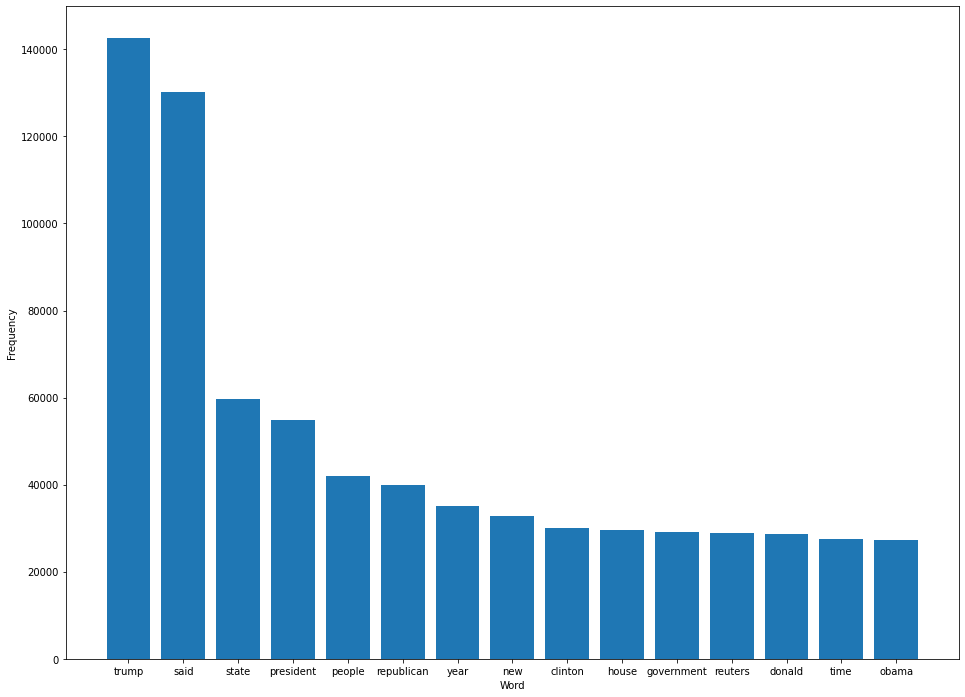

In [21]:
top_words_freqcies = [ word_frequencies[w] for w in top_words[:15]]
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
plt.bar(top_words[:15], top_words_freqcies )
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

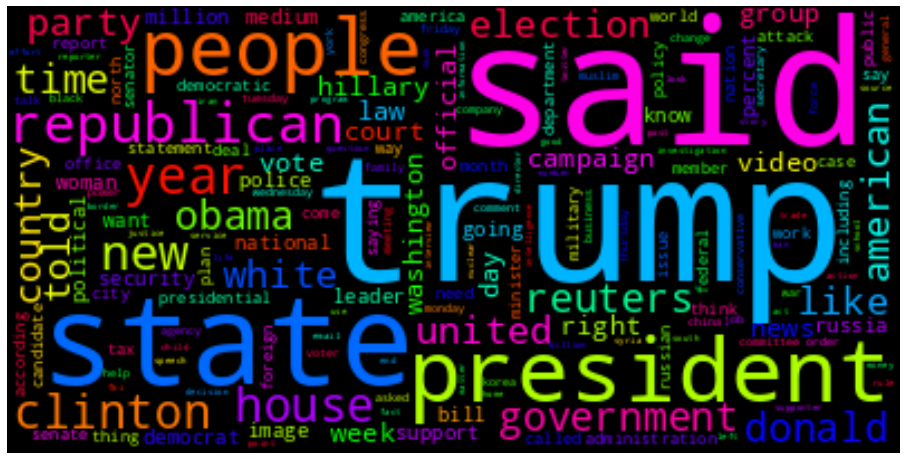

In [22]:
dictionary=word_frequencies
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
# getting TF feature vector

def get_feature_vector(text):
    counter = collections.Counter(text.split())
    top_words_counter = { k:v for k,v in counter.items() if k in top_words }
    total_count = sum(list(top_words_counter.values()))
    top_words_counter = { k:v/total_count for k,v in top_words_counter.items() }
    feature_vector = [ top_words_counter[word] if word in top_words_counter.keys() else 0 for word in top_words]
    return feature_vector

# Splitting Train & Test sets

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data['cleaned_text'].values,
                                                    df_data['label'].values,
                                                    test_size=0.3, random_state=42)

In [25]:
X_train_features = np.array([get_feature_vector(text) for text in X_train])
X_test_features = np.array([get_feature_vector(text) for text in X_test])

# shapes of train and test vectors
X_train_features.shape, X_test_features.shape

((31428, 500), (13470, 500))

# Building a Logistic Regression model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(penalty="l2", fit_intercept=True)
clf.fit(X_train_features, y_train)

train_predictions = clf.predict(X_train_features)

print("Classification Report on Train Data")
print(classification_report(y_train, train_predictions, target_names=['Fake', 'True']))

Classification Report on Train Data
              precision    recall  f1-score   support

        Fake       0.96      0.95      0.96     16485
        True       0.95      0.96      0.95     14943

    accuracy                           0.96     31428
   macro avg       0.96      0.96      0.96     31428
weighted avg       0.96      0.96      0.96     31428



In [27]:
print("Classification Report on Test Data")
test_predictions = clf.predict(X_test_features)
print(classification_report(y_test, test_predictions, target_names=['Fake', 'True']))

Classification Report on Test Data
              precision    recall  f1-score   support

        Fake       0.96      0.95      0.96      6996
        True       0.95      0.96      0.96      6474

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



In [35]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6996
           1       0.99      0.99      0.99      6474

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



# SVM Classification

In [28]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C = 1, gamma="scale")
clf.fit(X_train_features, y_train)

train_predictions = clf.predict(X_train_features)

print("Classification Report on Train Data")
print(classification_report(y_train, train_predictions, target_names=['Fake', 'True']))

Classification Report on Train Data
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00     16485
        True       1.00      1.00      1.00     14943

    accuracy                           1.00     31428
   macro avg       1.00      1.00      1.00     31428
weighted avg       1.00      1.00      1.00     31428



In [29]:
print("Classification Report on Test Data")
test_predictions = clf.predict(X_test_features)
print(classification_report(y_test, test_predictions, target_names=['Fake', 'True']))

Classification Report on Test Data
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      6996
        True       0.99      0.99      0.99      6474

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



# DNN implementation

In [30]:
from tensorflow import keras
from keras.layers import Dense, InputLayer, Dropout
from keras.models import Sequential

model = Sequential([
    InputLayer( input_shape=(500, )),
    Dense( 256, activation="relu"),
    Dropout(0.3),
    Dense( 128, activation="relu"),
    Dropout(0.3),
    Dense( 32, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile( loss="binary_crossentropy", optimizer = "adam", metrics="accuracy")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               128256    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

2023-04-30 21:56:33.696557: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
model.compile( loss="binary_crossentropy", optimizer = "adam", metrics="accuracy")

In [32]:
model.fit(X_train_features, y_train, epochs=10, batch_size=10)

2023-04-30 21:56:34.179377: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
3143/3143 [==============================] - 13s 817us/step - loss: 0.1678 - accuracy: 0.9243
Epoch 2/10
3143/3143 [==============================] - 3s 801us/step - loss: 0.0394 - accuracy: 0.9886
Epoch 3/10
3143/3143 [==============================] - 3s 800us/step - loss: 0.0285 - accuracy: 0.9917
Epoch 4/10
3143/3143 [==============================] - 3s 804us/step - loss: 0.0207 - accuracy: 0.9935
Epoch 5/10
3143/3143 [==============================] - 3s 807us/step - loss: 0.0159 - accuracy: 0.9955
Epoch 6/10
3143/3143 [==============================] - 3s 800us/step - loss: 0.0146 - accuracy: 0.9953
Epoch 7/10
3143/3143 [==============================] - 3s 805us/step - loss: 0.0104 - accuracy: 0.9970
Epoch 8/10
3143/3143 [==============================] - 3s 808us/step - loss: 0.0086 - accuracy: 0.9976
Epoch 9/10
3143/3143 [==============================] - 3s 821us/step - loss: 0.0080 - accuracy: 0.9979
Epoch 10/10
3143/3143 [==============================] - 3s 807

In [33]:
_, test_accuracy = model.evaluate(X_test_features, y_test)
print("Test accuracy : ", test_accuracy)

421/421 [==============================] - 1s 542us/step - loss: 0.0263 - accuracy: 0.9941
Test accuracy :  0.9940608739852905


In [34]:
model.evaluate(X_train_features, y_train)

983/983 [==============================] - 1s 528us/step - loss: 0.0036 - accuracy: 0.9988


[0.003629708895459771, 0.9988226890563965]

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
print(classification_report(y_test, model.predict_classes(X_test_features), target_names=['Fake', 'True']))

              precision    recall  f1-score   support

        Fake       0.99      1.00      0.99      6996
        True       1.00      0.99      0.99      6474

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

